In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.metrics import accuracy_score

In [46]:
df = pd.read_csv("/kaggle/input/mscad/MSCAD.csv")
df.head(10)

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min',Label
0,1518,2,5,110,377,110,0,55.0,77.7817,377,...,1,0,0,0,0,0,0,0,0,Brute_Force
1,5894,4,8,168,4498,168,0,42.0,84.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
2,272,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force
3,2611,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
4,294,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,Brute_Force
5,4529,4,8,314,4434,314,0,78.5,157.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
6,6111,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
7,8165,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
8,10106,4,8,332,4434,332,0,83.0,166.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force
9,11917,4,8,316,4434,316,0,79.0,158.0000,1460,...,1,0,0,0,0,0,0,0,0,Brute_Force


In [48]:
label_encoder = LabelEncoder()

df['Label'] = label_encoder.fit_transform(df['Label'])

df.head(10)

,'Flow Duration','Tot Fwd Pkts','Tot Bwd Pkts','TotLen Fwd Pkts','TotLen Bwd Pkts','Fwd Pkt Len Max','Fwd Pkt Len Min','Fwd Pkt Len Mean','Fwd Pkt Len Std','Bwd Pkt Len Max',...,'Fwd Act Data Pkts','Active Mean','Active Std','Active Max','Active Min','Idle Mean','Idle Std','Idle Max','Idle Min',Label
0,1518,2,5,110,377,110,0,55.0,77.7817,377,...,1,0,0,0,0,0,0,0,0,0
1,5894,4,8,168,4498,168,0,42.0,84.0000,1460,...,1,0,0,0,0,0,0,0,0,0
2,272,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,0
3,2611,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,0
4,294,1,1,0,0,0,0,0.0,0.0000,0,...,0,0,0,0,0,0,0,0,0,0
5,4529,4,8,314,4434,314,0,78.5,157.0000,1460,...,1,0,0,0,0,0,0,0,0,0
6,6111,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,0
7,8165,4,8,322,4434,322,0,80.5,161.0000,1460,...,1,0,0,0,0,0,0,0,0,0
8,10106,4,8,332,4434,332,0,83.0,166.0000,1460,...,1,0,0,0,0,0,0,0,0,0
9,11917,4,8,316,4434,316,0,79.0,158.0000,1460,...,1,0,0,0,0,0,0,0,0,0


In [47]:
print("Unique Classes are "+str(len(df['Label'].unique())))
df['Label'].unique()

Unique Classes are 6


array(['Brute_Force', 'HTTP_DDoS', 'ICMP_Flood', 'Normal', 'Port_Scan',
       'Web_Crwling'], dtype=object)

In [5]:
correlation_matrix = df.corr()

correlation_with_label = correlation_matrix['Label'].abs()
top_10_correlated_columns = correlation_with_label.sort_values(ascending=False).head(16)[1:]
top_10_columns = top_10_correlated_columns.index.tolist()
selected_df = df[top_10_columns]
selected_df.head(10)

,'Down/Up Ratio','Flow Duration','Fwd IAT Tot','Bwd Pkt Len Std','Pkt Len Std','Bwd Pkt Len Max','Flow IAT Max','ACK Flag Cnt','Pkt Len Max','Idle Max','Fwd IAT Max','Idle Mean','Idle Min','Bwd Pkts/s','Bwd Seg Size Avg'
0,2,1518,487,168.5995,133.4075,377,487,0,377,0,487,0,0,3293.8076,75.40
1,2,5894,5583,744.4771,629.9612,1460,2675,0,1460,0,2675,0,0,1357.3125,562.25
2,1,272,0,0.0000,0.0000,0,272,1,0,0,0,0,0,3676.4706,0.00
3,2,2611,2351,750.2544,629.9098,1460,753,0,1460,0,1368,0,0,3063.9602,554.25
4,1,294,0,0.0000,0.0000,0,294,1,0,0,0,0,0,3401.3605,0.00
5,2,4529,4154,750.2544,629.9601,1460,2124,0,1460,0,2124,0,0,1766.3943,554.25
6,2,6111,5853,750.2544,629.9098,1460,2456,0,1460,0,3052,0,0,1309.1147,554.25
7,2,8165,7940,750.2544,629.9098,1460,3952,0,1460,0,5095,0,0,979.7918,554.25
8,2,10106,9874,750.2544,629.8579,1460,6317,0,1460,0,7026,0,0,791.6089,554.25
9,2,11917,11638,750.2544,629.9468,1460,8297,0,1460,0,9061,0,0,671.3099,554.25


In [6]:
selected_df.shape, df.shape

((128799, 15), (128799, 67))

In [7]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(selected_df)
selected_df = pd.DataFrame(scaled_data, columns=selected_df.columns)
selected_df['Label'] = df['Label']

print("Scaled data:")
selected_df.head(10)

Scaled data:


,'Down/Up Ratio','Flow Duration','Fwd IAT Tot','Bwd Pkt Len Std','Pkt Len Std','Bwd Pkt Len Max','Flow IAT Max','ACK Flag Cnt','Pkt Len Max','Idle Max','Fwd IAT Max','Idle Mean','Idle Min','Bwd Pkts/s','Bwd Seg Size Avg',Label
0,0.872400,-0.365583,-0.337561,-0.297168,-0.332741,-0.267856,-0.284295,-0.795725,-0.264379,-0.261219,-0.262023,-0.256744,-0.245495,0.523996,-0.554955,0
1,0.872400,-0.365451,-0.337389,1.313647,1.302317,1.307374,-0.284142,-0.795725,1.245935,-0.261219,-0.261847,-0.256744,-0.245495,0.027806,1.204814,0
2,-0.170366,-0.365621,-0.337578,-0.768766,-0.772026,-0.816205,-0.284310,1.256715,-0.790131,-0.261219,-0.262063,-0.256744,-0.245495,0.622046,-0.827496,0
3,0.872400,-0.365550,-0.337498,1.329807,1.302147,1.307374,-0.284276,-0.795725,1.245935,-0.261219,-0.261952,-0.256744,-0.245495,0.465102,1.175897,0
4,-0.170366,-0.365620,-0.337578,-0.768766,-0.772026,-0.816205,-0.284308,1.256715,-0.790131,-0.261219,-0.262063,-0.256744,-0.245495,0.551555,-0.827496,0
5,0.872400,-0.365492,-0.337438,1.329807,1.302313,1.307374,-0.284180,-0.795725,1.245935,-0.261219,-0.261891,-0.256744,-0.245495,0.132625,1.175897,0
6,0.872400,-0.365444,-0.337380,1.329807,1.302147,1.307374,-0.284157,-0.795725,1.245935,-0.261219,-0.261816,-0.256744,-0.245495,0.015456,1.175897,0
7,0.872400,-0.365382,-0.337310,1.329807,1.302147,1.307374,-0.284053,-0.795725,1.245935,-0.261219,-0.261651,-0.256744,-0.245495,-0.068927,1.175897,0
8,0.872400,-0.365324,-0.337245,1.329807,1.301977,1.307374,-0.283888,-0.795725,1.245935,-0.261219,-0.261495,-0.256744,-0.245495,-0.117145,1.175897,0
9,0.872400,-0.365269,-0.337185,1.329807,1.302269,1.307374,-0.283749,-0.795725,1.245935,-0.261219,-0.261331,-0.256744,-0.245495,-0.147970,1.175897,0


In [9]:
X = selected_df.drop('Label', axis=1)
y = selected_df['Label']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (103039, 15)
Shape of X_test: (25760, 15)
Shape of y_train: (103039,)
Shape of y_test: (25760,)


# Trees (Decision Tree, Random Forest)

In [34]:
from sklearn.tree import DecisionTreeClassifier

best_DT = 0

for i in tqdm(range(5,10)):
    for j in range(5,10):
        for k in range(10,50,2):
            clf = DecisionTreeClassifier(random_state=k, max_features = j, max_depth = i)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_DT:
                best_DT = accuracy
                print(f"Max Depth: {i}, max Features: {j}, random_state: {k}, Accuracy: {accuracy}")
            
print("Best Accuracy of the Decision Tree classifier:", best_DT)

  0%|          | 0/5 [00:00<?, ?it/s]

Max Depth: 5, max Features: 5, random_state: 10, Accuracy: 0.9721273291925466
Max Depth: 5, max Features: 5, random_state: 12, Accuracy: 0.9867624223602485
Max Depth: 5, max Features: 5, random_state: 34, Accuracy: 0.9879270186335404
Max Depth: 5, max Features: 5, random_state: 40, Accuracy: 0.9888198757763975
Max Depth: 5, max Features: 6, random_state: 16, Accuracy: 0.9888586956521739
Max Depth: 5, max Features: 6, random_state: 22, Accuracy: 0.9899844720496894
Max Depth: 5, max Features: 7, random_state: 12, Accuracy: 0.9908773291925466
Max Depth: 5, max Features: 7, random_state: 20, Accuracy: 0.9909161490683229
Max Depth: 5, max Features: 7, random_state: 46, Accuracy: 0.9914984472049689


 20%|██        | 1/5 [00:24<01:36, 24.17s/it]

Max Depth: 6, max Features: 5, random_state: 14, Accuracy: 0.9922360248447205
Max Depth: 6, max Features: 5, random_state: 34, Accuracy: 0.9925077639751553
Max Depth: 6, max Features: 6, random_state: 16, Accuracy: 0.9932453416149069
Max Depth: 6, max Features: 7, random_state: 34, Accuracy: 0.9937111801242235
Max Depth: 6, max Features: 8, random_state: 46, Accuracy: 0.9938664596273292


 40%|████      | 2/5 [00:51<01:18, 26.09s/it]

Max Depth: 7, max Features: 5, random_state: 12, Accuracy: 0.9946428571428572
Max Depth: 7, max Features: 5, random_state: 26, Accuracy: 0.9947204968944099
Max Depth: 7, max Features: 7, random_state: 16, Accuracy: 0.9948369565217391
Max Depth: 7, max Features: 7, random_state: 32, Accuracy: 0.9949922360248448
Max Depth: 7, max Features: 8, random_state: 44, Accuracy: 0.9950310559006211
Max Depth: 7, max Features: 8, random_state: 46, Accuracy: 0.9952639751552795


 60%|██████    | 3/5 [01:22<00:56, 28.10s/it]

Max Depth: 8, max Features: 5, random_state: 38, Accuracy: 0.9953416149068323
Max Depth: 8, max Features: 5, random_state: 46, Accuracy: 0.9959627329192546


 80%|████████  | 4/5 [01:55<00:30, 30.24s/it]

Max Depth: 9, max Features: 5, random_state: 28, Accuracy: 0.996583850931677


100%|██████████| 5/5 [02:30<00:00, 30.08s/it]

Best Accuracy of the Decision Tree classifier: 0.996583850931677


In [36]:
from sklearn.ensemble import RandomForestClassifier

best_RF = 0

for i in tqdm(range(5, 10, 2)):
    for j in range(5, 10, 2):
        for k in range(10, 50, 4):
            clf = RandomForestClassifier(random_state=42 , max_features=j, max_depth=i)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test) 
            accuracy = accuracy_score(y_test, y_pred)
            if accuracy > best_RF:
                best_RF = accuracy
                print(f"Max Depth: {i}, Max Features: {j}, Random State: {k}, Accuracy: {accuracy}")

print("Best Accuracy of the Random Forest classifier:", best_RF)

  0%|          | 0/3 [00:00<?, ?it/s]

Max Depth: 5, Max Features: 5, Random State: 10, Accuracy: 0.9839285714285714
Max Depth: 5, Max Features: 7, Random State: 10, Accuracy: 0.9846273291925466
Max Depth: 5, Max Features: 9, Random State: 10, Accuracy: 0.9847049689440994


 33%|███▎      | 1/3 [08:09<16:18, 489.44s/it]

Max Depth: 7, Max Features: 5, Random State: 10, Accuracy: 0.9945652173913043
Max Depth: 7, Max Features: 7, Random State: 10, Accuracy: 0.9951475155279503


 67%|██████▋   | 2/3 [18:10<09:15, 555.22s/it]

Max Depth: 9, Max Features: 5, Random State: 10, Accuracy: 0.9960403726708075


100%|██████████| 3/3 [29:19<00:00, 586.59s/it]

Best Accuracy of the Random Forest classifier: 0.9960403726708075


# SVM

In [52]:
from sklearn.svm import SVC

clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
             
print("Best Accuracy of the SVM classifier:", accuracy)

print(classification_report(y_test, y_pred))

Best Accuracy of the SVM classifier: 0.9850155279503106
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17860
           1       0.89      0.92      0.90       118
           2       0.00      0.00      0.00        10
           3       0.98      0.96      0.97      5602
           4       0.94      0.95      0.94      2165
           5       0.00      0.00      0.00         5

    accuracy                           0.99     25760
   macro avg       0.63      0.64      0.64     25760
weighted avg       0.98      0.99      0.98     25760



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# LSTM

In [22]:
X_train.shape

(103039, 15)

In [32]:
# Reshape training and testing data for LSTM
sequence_length = 5  # You may need to adjust this based on the sequence length you want to use
X_train_seq = np.reshape(X_train, (X_train.shape[0], sequence_length, X_train.shape[1] // sequence_length))
X_test_seq = np.reshape(X_test, (X_test.shape[0], sequence_length, X_test.shape[1] // sequence_length))

# Define and compile the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]), return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')  # 6 classes for classification
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(X_train_seq, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Model evaluation
y_pred_prob = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

print("Best Accuracy of the LSTM classifier:", accuracy_score(y_test, y_pred))
LSTM_accuracy = accuracy_score(y_test, y_pred)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2898/2898 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.9158 - loss: 0.3079 - val_accuracy: 0.9813 - val_loss: 0.0755
Epoch 2/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9774 - loss: 0.0811 - val_accuracy: 0.9789 - val_loss: 0.0671
Epoch 3/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.9826 - loss: 0.0647 - val_accuracy: 0.9841 - val_loss: 0.0534
Epoch 4/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 40s 7ms/step - accuracy: 0.9863 - loss: 0.0567 - val_accuracy: 0.9874 - val_loss: 0.0514
Epoch 5/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9869 - loss: 0.0552 - val_accuracy: 0.9926 - val_loss: 0.0354
Epoch 6/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9896 - loss: 0.0468 - val_accuracy: 0.9928 - val_loss: 0.0345
Epoch 7/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9900 - loss: 0.0457 - val_accuracy: 0.9938 - val_loss: 0.0341
Epoch 8/10
2898/2898 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.9905 - loss: 0.0444 - val

In [50]:
y_pred_prob = model.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))

805/805 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17860
           1       0.91      0.92      0.92       118
           2       0.00      0.00      0.00        10
           3       0.99      0.99      0.99      5602
           4       0.99      0.96      0.98      2165
           5       0.00      0.00      0.00         5

    accuracy                           0.99     25760
   macro avg       0.65      0.65      0.65     25760
weighted avg       0.99      0.99      0.99     25760



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Isolation Forest

In [31]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)

# Fit the model to your data
isolation_forest.fit(X_train)

# Predict the anomaly scores for the training and testing data
train_anomaly_scores = isolation_forest.decision_function(X_train)
test_anomaly_scores = isolation_forest.decision_function(X_test)

threshold = 0  # Adjust the threshold as needed
train_anomalies_predicted = train_anomaly_scores < threshold
test_anomalies_predicted = test_anomaly_scores < threshold


print("Testing set classification report:")
print(classification_report(y_test, test_anomalies_predicted))

Isolaion_tree_acc = accuracy_score(y_test, test_anomalies_predicted)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Testing set classification report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     17860
           1       0.05      0.48      0.08       118
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00      5602
           4       0.00      0.00      0.00      2165
           5       0.00      0.00      0.00         5

    accuracy                           0.70     25760
   macro avg       0.13      0.25      0.15     25760
weighted avg       0.51      0.70      0.58     25760



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Comparison

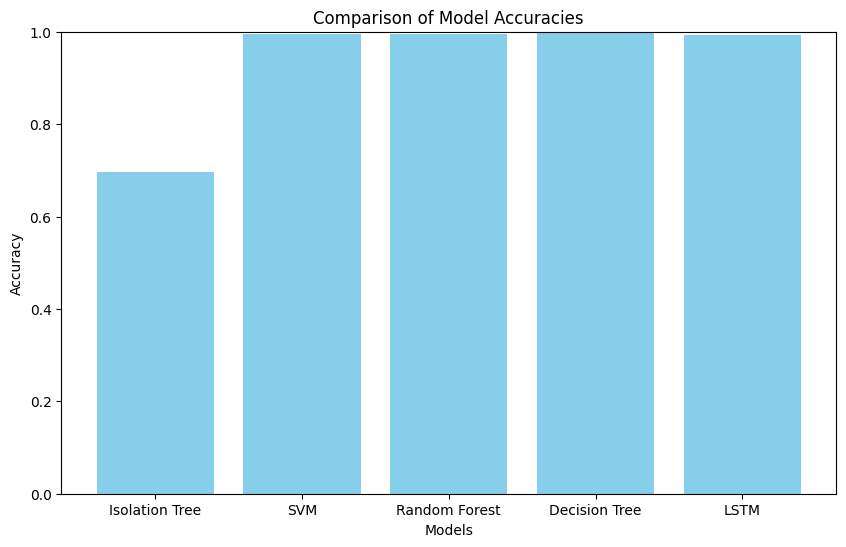

In [40]:
import matplotlib.pyplot as plt

# Assuming you have collected accuracies for different models
model_names = ['Isolation Tree', 'SVM', 'Random Forest', 'Decision Tree', 'LSTM']
accuracies = [Isolaion_tree_acc, accuracy, best_RF, best_DT, LSTM_accuracy] 

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)
plt.show()

In [44]:
print([round(x,3)*100 for x in accuracies])

[69.5, 99.6, 99.6, 99.7, 99.4]
